# Regresion logistica

Sabemos que la regresion lineal es una funcion que esta denotada por y = wx + b donde 
w es la pendiente y b es los pasos que da x en el eje, ahora sabiendo esto la regression
logistica que ya es una regresion de clasificacion usa esta misma ecuacion para 
clasificar los datos en este caso y(x)= b + w1x1 + w2x2 donde x son las caracteristicas

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

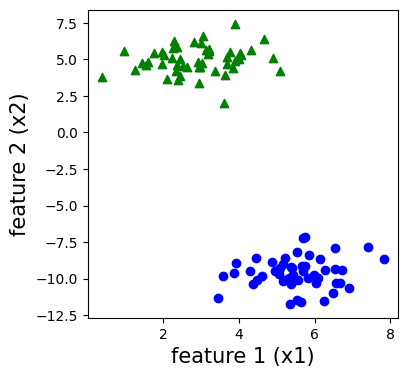

In [6]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=10)

plt.figure(figsize=(4,4))
for target, color , marker in zip(range(2),['b','g'],['o','^']):
    plt.scatter(X[y==target,0],X[y==target,1],c=color,marker=marker,
                label='class '+format(target))
    plt.xlabel('feature 1 (x1)',fontsize=15)
    plt.ylabel('feature 2 (x2)',fontsize=15)
    plt.grid()

plt.show()

Necesitamos en estos casos convertir las señales deuna forma binaria, recordemos que 
machine learning es una tecnica que usa numero y aprende de ellos, en este caso 
tenemos attributos que son la clase 0 y la clase 1 entonces para esto tenemosque 
convertir la señales en binario

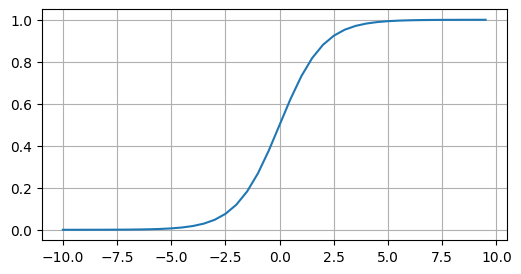

In [7]:
# Funcion sigmoid usada para covertir las etiquetas en binario (clase 0 o clase 1)
import numpy as np

def sigmoid(t):
    return 1/(1+np.exp(-t))

t = np.arange(-10,10,0.5)
y = sigmoid(t)
plt.figure(figsize=(6,3))
plt.plot(t,y)
plt.grid()
plt.show()

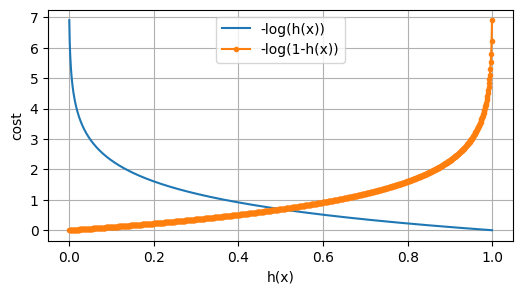

In [8]:
import matplotlib.pyplot as plt
import numpy as np


def minus_log(t):
    return -np.log(t)

t = np.arange(0.001,1,0.001)
y1 = minus_log(t)
y2 = minus_log(1-t)

plt.figure(figsize=(6,3))
plt.plot(t,y1,label='-log(h(x))')
plt.plot(t,y2,marker='.', label='-log(1-h(x))')
plt.xlabel('h(x)'); plt.ylabel('cost')
plt.legend()
plt.grid()
plt.show()

## Aplicacion del gradiente 

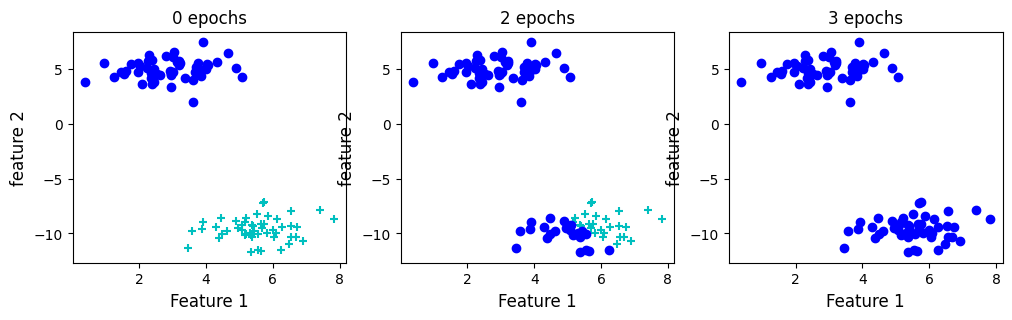

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Nos ayuda a convertir en binarion los valores para clasificar
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Predecimos los valores que se nos pase por x para y
def prediction(theta,x):
    return theta[0]*theta[1]*x[0]+theta[2]*x[1]


# indicamos que clasificacion seria 0 o 1 (feature 1 or feature 2)
def label(theta,x):
    return int(round(sigmoid(prediction(theta,x))))

def gradient(theta,X,y,j):
    sum = 0
    for i in range(X.shape[0]):
        if j == 0:
            X_aux = 1
        else:
            X_aux = X[i,j-1]
        sum += (sigmoid(prediction(theta,X[i])) - y[i])*X_aux
    return sum/X.shape[0]

def fit(theta,X,y,epochs):
    for e in range(epochs):
        for j in range(len(theta)):
            theta[j] -= gradient(theta,X,y,j)
    return theta


X,y = make_blobs(n_samples=100, n_features=2,centers=2, random_state=10)

fig, axs = plt.subplots(1,3,figsize=(12,3))
theta_0 = [8.7,9.1,6.4]

for i,ax in zip([0,2,3],axs):
    theta = fit(theta_0,X,y,i)
    label_y = []
    for row in range(len(y)):
        label_y.append(label(theta,X[row]))
    
    # las caracteristicas incorrecta
    ax.scatter(X[y!=label_y,0],X[y!=label_y,1], c='c',marker='+')

    # las caracteristicas correctas 
    ax.scatter(X[y==label_y,0],X[y==label_y,1],c='b',marker='o')
    ax.set_title(format(i)+' epochs')
    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('feature 2', fontsize=12)

plt.show()


**Conclusion:** Viendo los graficos de arriba se logran observar que cuando no realizamos intentos no podemos clasificar de manera correcta los valores, una vez que incrementamos 
los intentos en el modelo, este va aprendiendo cual seria el valor deseado para esa 
clasificacion

## Regresion logistica usando Scikit

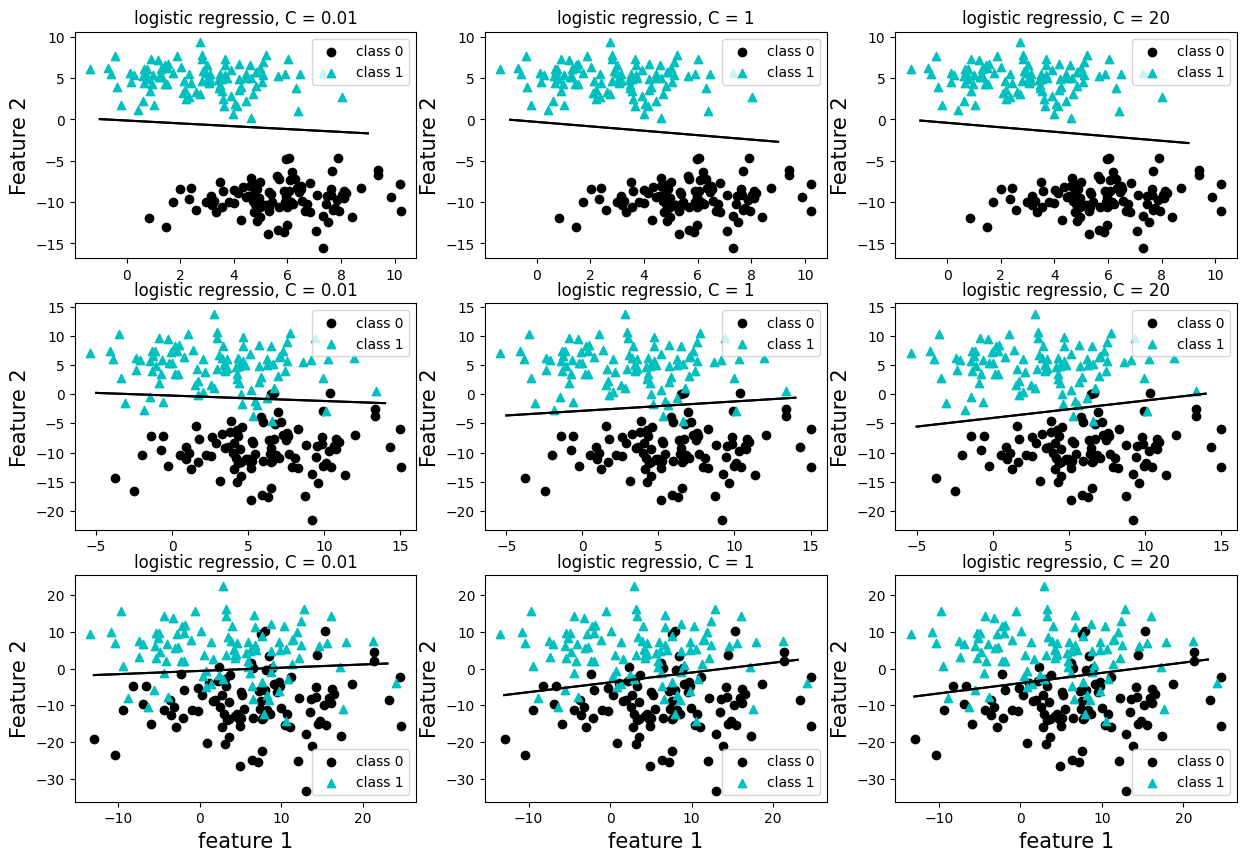

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

fig, axs = plt.subplots(3,3,figsize=(15,10))

def plot_line(row,column, slope, intercept, X):
    min_x = int(min(X[:,0]))
    max_x = int(max(X[:,0]))
    x = range(min_x,max_x)
    y = -(x*slope[0] + intercept)/slope[1]
    axs[row,column].plot(x,y,color='black')
    return


for clusterDesviation,row in zip([2,4,8],range(3)):
    X,y = make_blobs(n_samples=200,n_features=2,centers=2,random_state=10,
                     cluster_std=clusterDesviation)
    # c es la regularizacion L2
    for C, column in zip([0.01,1,20], range(3)):
        logistic_regression = LogisticRegression(C=C,solver='liblinear')
        lr = logistic_regression.fit(X,y)
        for target,color,marker in zip(range(2),['k','c'],['o','^']):
            axs[row,column].scatter(X[y==target,0],X[y==target,1],c=color,marker=marker,
                                   label='class '+format(target))
            if row == 2:
                axs[row,column].set_xlabel('feature 1', fontsize=15)
            axs[row,column].set_ylabel('Feature 2',fontsize=15)
            axs[row,column].set_title('logistic regressio, C = '+str(C))
            axs[row,column].legend()
            plot_line(row,column,lr.coef_[0],lr.intercept_,X)


plt.show()


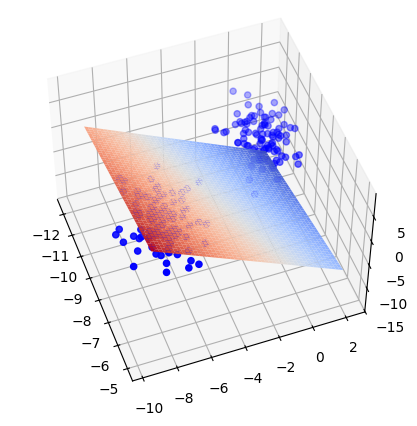

In [ ]:
# Tambine podemos agregar una nueva cordenada en z si subimos los niveles a 3

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
import numpy as np


X, y = make_blobs(n_samples=200,n_features=3,centers=2,random_state=9,
                  cluster_std=0.9)

logistic_regression = LogisticRegression(C=2, solver='liblinear')
lr = logistic_regression.fit(X,y)

X_h = np.arange(int(min(X[:,0])), int(max(X[:,0])), 0.001)
Y_h = np.arange(int(min(X[:,1])), int(max(X[:,1])), 0.001)
X_h,Y_h = np.meshgrid(X_h,Y_h)

# sacamos los nuevos punto en el eje z con los valores de x y y con su coeficiente 
Z = -(lr.coef_[0][0]*X_h+lr.coef_[0][1]* Y_h+lr.intercept_)/lr.coef_[0][2]

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d', elev=50, azim=-20)

ax.scatter(X[:,0],X[:,1], y,c='b',marker='o')
ax.plot_surface(X_h,Y_h,Z,cmap=cm.coolwarm)
plt.show()



In [ ]:
import pandas as pd

fruits = pd.DataFrame({
    "Apples": 30,
    "Bananas": 21
}, index=pd.Index([0]))

fruits



,Apples,Bananas
0,30,21


In [ ]:
fruit_sales = pd.DataFrame(data={
    "apple":{
        "2017 Sales": 35,
        "2018 Sales": 41
    },
    "Bananas": {
        "2017 Sales": 21,
        "2018 Sales": 34
    }
})

fruit_sales

,apple,Bananas
2017 sales,35,21
2018 sales,41,34


In [ ]:
ingredients = pd.Series(data={
    'Flour':'4 cups',
    'Milk': '1 cup',
    'Eggs': '2 large',
    'Spam': '1 can'
},name='Dinner')

ingredients

test = pd.read_csv()

Flour     4 cups
Milk       1 cup
Eggs     2 large
Spam       1 can
Name: Dinner, dtype: object

# Regresion logistica multi clases(3)

en la regresion logistica es muy buena para distribuciones de clasificacion 
binary, lo cual quiere decir que algo es o no es, pero sckit si permite usar
el framework con distribuciones multiclass osea no solo 0,1

c:\Users\juanc\OneDrive\Documentos\IA Resource\UdemyIAResource\MachineLearningModels\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\juanc\OneDrive\Documentos\IA Resource\UdemyIAResource\MachineLearningModels\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\juanc\OneDrive\Documentos\IA Resource\UdemyIAResource\MachineLearningModels\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to

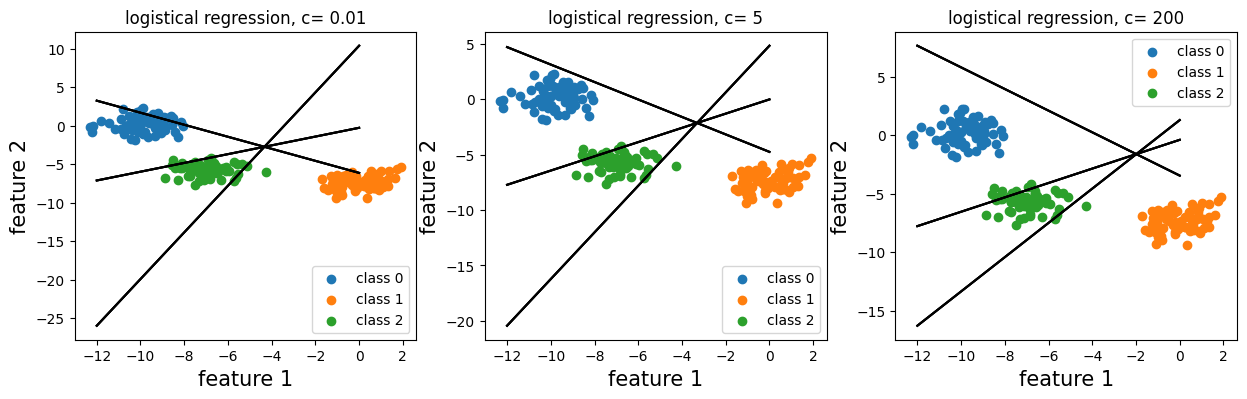

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs


def plot_line(ax,slope,intercept,X):
    min_x = int(min(X[:,0]))
    max_x = int(max(X[:,0]))
    x = range(min_x,max_x)
    y = -(x*slope[0] + intercept)/slope[1]
    ax.plot(x,y, color='black')
    return


CENTERS = 3

X,y = make_blobs(n_samples=200,n_features=2, centers=CENTERS, random_state=9,
                 cluster_std=0.9)

fig, ax = plt.subplots(1,3,figsize=(15,4))

for C, ax in zip([0.01,5,200],ax):
    logistic_regression = LogisticRegression(C=C,solver='newton-cg', multi_class='multinomial')
    lr = logistic_regression.fit(X,y)
    for target in range(CENTERS):
        ax.scatter(X[y==target,0],X[y==target,1], label='class '+format(target))
        ax.set_xlabel('feature 1', fontsize=15)
        ax.set_ylabel('feature 2', fontsize=15)
        ax.set_title('logistical regression, c= '+str(C))
        ax.legend()
        for i in range(CENTERS):
            plot_line(ax,lr.coef_[i],lr.intercept_[i], X)
        
    
plt.show()

